## importing libraries


In [1]:
import numpy as np
import pandas as pd
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt
%matplotlib inline
# Setup style of charts
plt.style.use('seaborn')


## reading data

In [3]:
df = pd.read_csv('coin_Bitcoin.csv')
df.head()


,Symbol,Date,High,Low,Open,Close,Volume
0,BTC,2018-01-01 23:59:59,14112.200195,13154.700195,14112.200195,13657.200195,1.029120e+10
1,BTC,2018-01-02 23:59:59,15444.599609,13163.599609,13625.000000,14982.099609,1.684660e+10
2,BTC,2018-01-03 23:59:59,15572.799805,14844.500000,14978.200195,15201.000000,1.687190e+10
3,BTC,2018-01-04 23:59:59,15739.700195,14522.200195,15270.700195,15599.200195,2.178320e+10
4,BTC,2018-01-05 23:59:59,17705.199219,15202.799805,15477.200195,17429.500000,2.384090e+10


Septate the dataset 

In [4]:
date = df['Date']
date[:10]

0    2018-01-01 23:59:59
1    2018-01-02 23:59:59
2    2018-01-03 23:59:59
3    2018-01-04 23:59:59
4    2018-01-05 23:59:59
5    2018-01-06 23:59:59
6    2018-01-07 23:59:59
7    2018-01-08 23:59:59
8    2018-01-09 23:59:59
9    2018-01-10 23:59:59
Name: Date, dtype: object

In [5]:
close = df['Close']
close[:10]


0    13657.200195
1    14982.099609
2    15201.000000
3    15599.200195
4    17429.500000
5    17527.000000
6    16477.599609
7    15170.099609
8    14595.400391
9    14973.299805
Name: Close, dtype: float64

### plot

Text(0.5, 1.0, 'Bitcoin Chart')

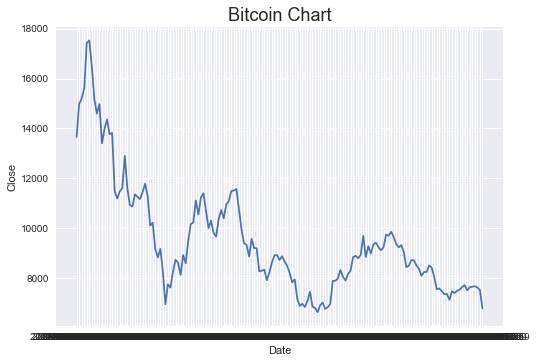

In [6]:
plt.plot(date, close)
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Bitcoin Chart", fontsize=18)


Now we create a sliding window of size 20 and calculate the moving average.
Then repeat for window size 50.

In [7]:
slide_20 = sliding_window_view(close, window_shape=20)
slide_20_avg = slide_20.mean(axis=1)
slide_20_avg[:10]


array([14180.5699707 , 14077.71494141, 13875.17998047, 13658.55      ,
       13446.56000977, 13138.0550293 , 12820.27504883, 12568.43007813,
       12399.24008789, 12234.29008789])

In [8]:
slide_50 = sliding_window_view(close, window_shape=50)
slide_50_avg = slide_50.mean(axis=1)
slide_50_avg[:10]

array([11550.00263672, 11504.93263672, 11419.09865234, 11315.17865234,
       11209.21664062, 11056.88804687, 10899.64265625, 10777.42466797,
       10688.53466797, 10604.58466797])

In this section we need to unify the date size and the moving average so we use np.NAN data to fill the gap.


In [10]:
slide_20_avg = np.concatenate([[np.NAN]*19, slide_20_avg])
slide_50_avg = np.concatenate([[np.NAN]*49, slide_50_avg])


Now we add the average period of 20 and 50 days to the chart.

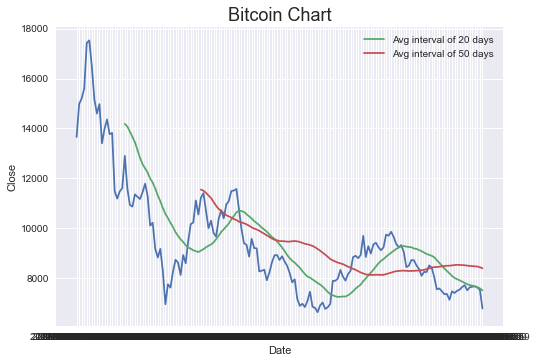

In [11]:
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Bitcoin Chart", fontsize=18)
plt.plot(date, close)
plt.plot(date, slide_20_avg, label = "Avg interval of 20 days")
plt.plot(date, slide_50_avg, label = "Avg interval of 50 days")
plt.legend()


To obtain the intersection of the two intervals, we use the following function and remove the np.NAN points from the result.


In [12]:
def find_intersection(MA_array_20, MA_array_50):
     return np.argwhere(np.diff(np.sign(MA_array_20 - MA_array_50))).flatten()
intersection_points = find_intersection(slide_20_avg, slide_50_avg)
intersection_points = intersection_points[49:]
intersection_points


array([ 61,  78, 115, 144], dtype=int64)

In the last step, we add the intersection points to the graph.

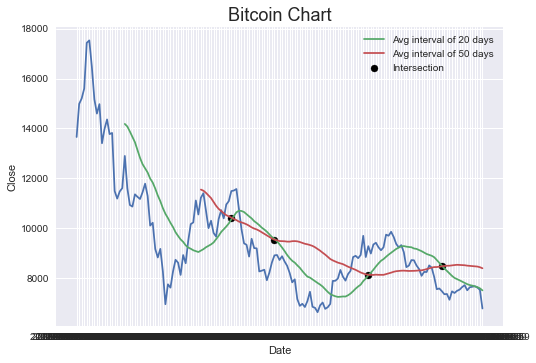

In [13]:
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Bitcoin Chart", fontsize=18)
plt.plot(date, close)
plt.plot(date, slide_20_avg, label="Avg interval of 20 days")
plt.plot(date, slide_50_avg, label="Avg interval of 50 days")
plt.scatter(date[intersection_points], slide_50_avg[intersection_points],
 c='black', marker='o', label="Intersection")
plt.legend()

## Ali Allahverdi 
## 9713114060